In [60]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import pandas as pd

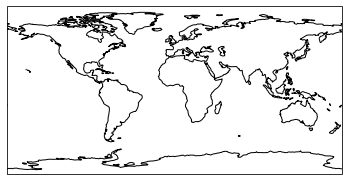

In [31]:
m = plt.axes(projection=ccrs.PlateCarree())
m.coastlines()

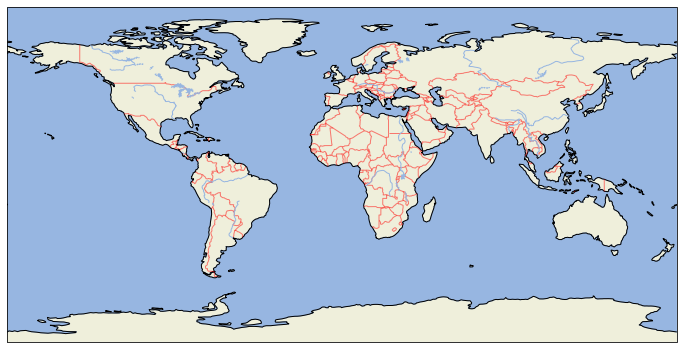

In [43]:
plt.figure(figsize=(12,12))
m = plt.axes(projection=ccrs.PlateCarree())

m.add_feature(cfeature.LAND)
m.add_feature(cfeature.OCEAN)
m.add_feature(cfeature.COASTLINE)
m.add_feature(cfeature.BORDERS, color = "red", alpha = 0.5)
m.add_feature(cfeature.LAKES, linestyle = ':')
m.add_feature(cfeature.RIVERS)

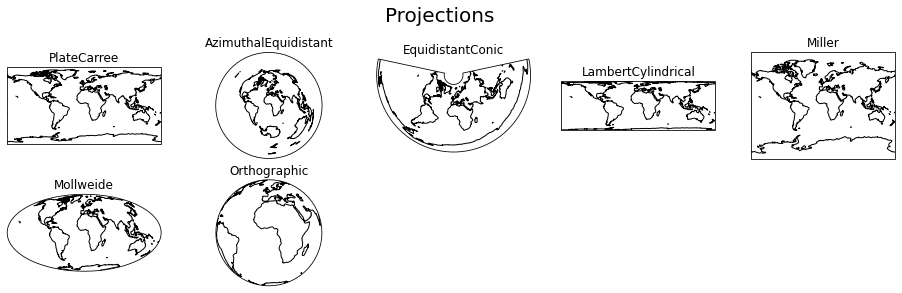

In [15]:
fig = plt.figure(figsize=(16,16))
fig.suptitle('Projections', fontsize=20, y=0.92)

projections = {'PlateCarree': ccrs.PlateCarree(),
               'AzimuthalEquidistant': ccrs.AzimuthalEquidistant(),
               'EquidistantConic': ccrs.EquidistantConic(), 
               'LambertCylindrical': ccrs.LambertCylindrical(), 
               'Miller': ccrs.Miller(), 
               'Mollweide': ccrs.Mollweide(), 
               'Orthographic': ccrs.Orthographic()}

for index, projection in enumerate(projections.items()):
    ax = fig.add_subplot(7, 5, index+1, projection=projection[1])
    ax.coastlines()
    ax.set_title(projection[0])

C:\Users\mhugh\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:844: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
C:\Users\mhugh\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:850: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<__array_function__ internals>:5: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
C:\Users\mhugh\anaconda3\lib\site-packages\numpy\lib\function_base.py:4817: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. 

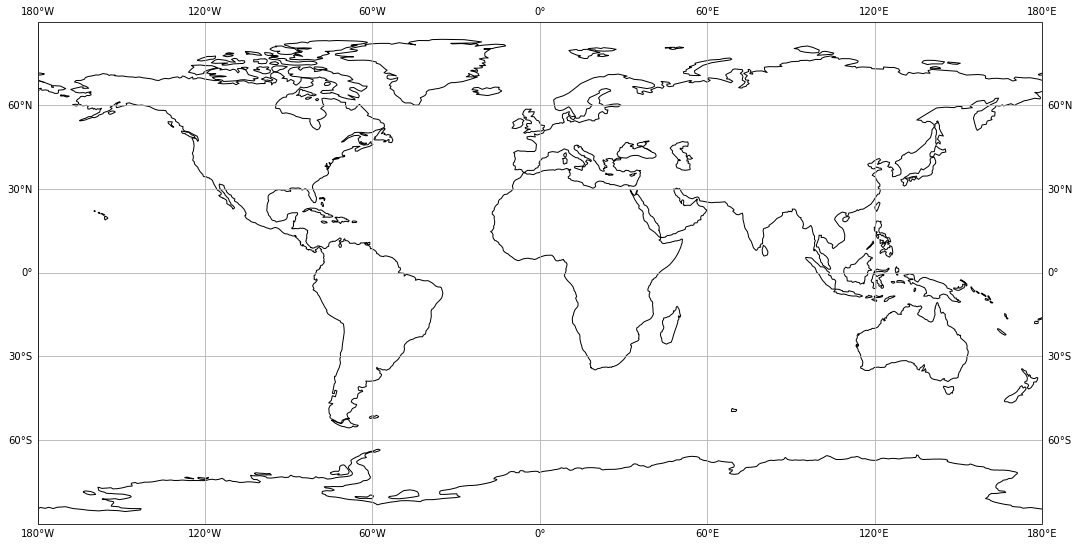

In [16]:
# latitude and longitude with east and west, etc.
plt.figure(figsize=(18, 12))
m8 = plt.axes(projection=ccrs.PlateCarree())
grid_lines = m8.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
m8.coastlines()

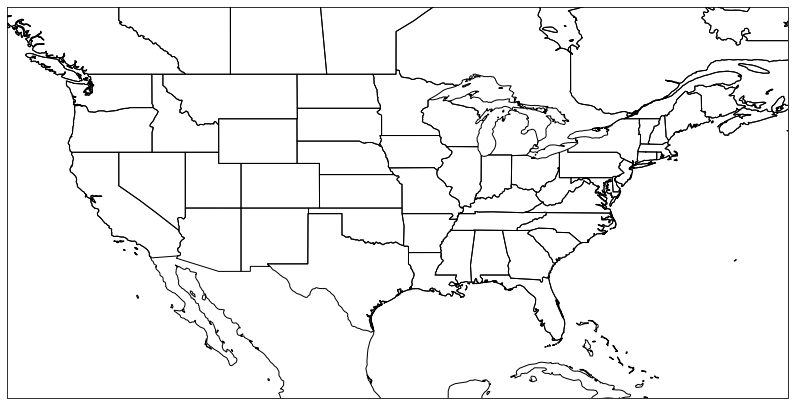

In [45]:
fig = plt.figure(figsize=(14, 14))
m = plt.axes(projection=ccrs.PlateCarree())
# (x0, x1, y0, y1)
m.set_extent([-130, -60, 20, 55], ccrs.PlateCarree())         
m.add_feature(cfeature.STATES)
m.coastlines()

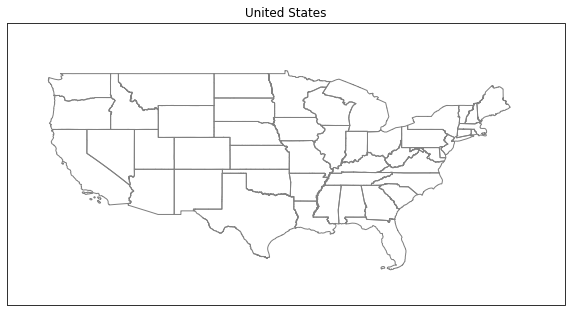

In [88]:
reader = shpreader.Reader('./data/state/tl_2021_us_state.dbf')
states = list(reader.geometries())
STATES = cfeature.ShapelyFeature(states, ccrs.PlateCarree())

plt.figure(figsize=(10, 6))
m = plt.axes(projection=ccrs.PlateCarree())
plt.title("United States")
m.set_extent([-130, -60, 20, 50])
m.add_feature(STATES, facecolor='none', edgecolor='gray')

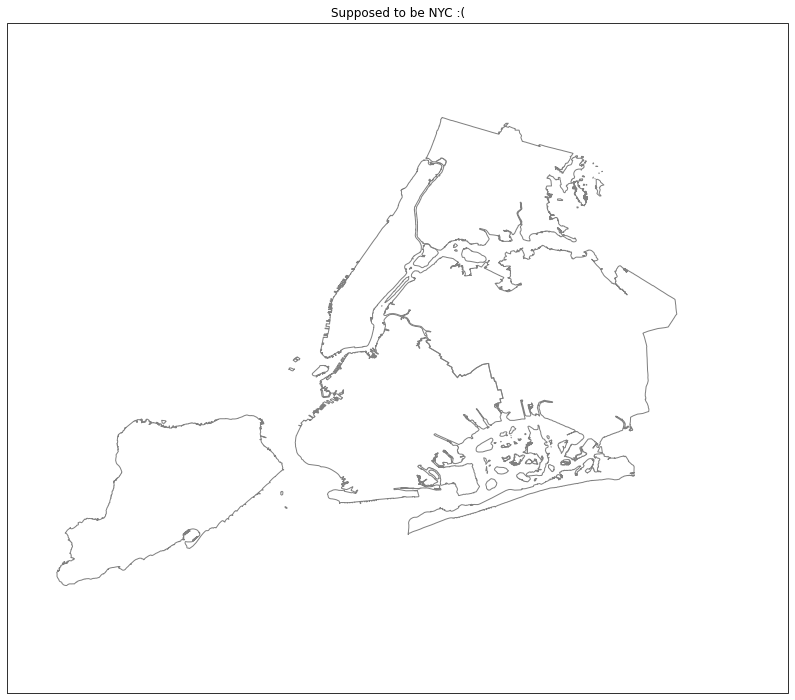

In [102]:
reader = shpreader.Reader('./data/nyc2/geo_export_a1f96cd2-7ce6-44bb-9568-f3ee8bcba44a.dbf')
geom = list(reader.geometries())
GEOM = cfeature.ShapelyFeature(geom, ccrs.PlateCarree())

plt.figure(figsize=(14, 14))
m = plt.axes(projection=ccrs.PlateCarree())
plt.title("Supposed to be NYC :(")
m.set_extent([-74.3, -73.6, 40.4, 41])
m.add_feature(GEOM, facecolor='none', edgecolor='gray')

In [61]:
df = pd.read_csv("./data/nyc_mv_collisons_202201.csv")
print(df.shape)
df.head()

(6231, 29)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/01/2022,7:05,NaN,NaN,NaN,NaN,NaN,EAST 128 STREET,3 AVENUE BRIDGE,NaN,...,NaN,NaN,NaN,NaN,4491172,Sedan,NaN,NaN,NaN,NaN
1,01/01/2022,14:43,NaN,NaN,40.769993,-73.915825,"(40.769993, -73.915825)",GRAND CENTRAL PKWY,NaN,NaN,...,NaN,NaN,NaN,NaN,4491406,Sedan,Sedan,NaN,NaN,NaN
2,01/01/2022,21:20,QUEENS,11414.0,40.657230,-73.841380,"(40.65723, -73.84138)",91 STREET,160 AVENUE,NaN,...,NaN,NaN,NaN,NaN,4491466,Sedan,NaN,NaN,NaN,NaN
3,01/01/2022,4:30,NaN,NaN,NaN,NaN,NaN,Southern parkway,Jfk expressway,NaN,...,Unspecified,NaN,NaN,NaN,4491626,Sedan,Sedan,NaN,NaN,NaN
4,01/01/2022,7:57,NaN,NaN,NaN,NaN,NaN,WESTCHESTER AVENUE,SHERIDAN EXPRESSWAY,NaN,...,NaN,NaN,NaN,NaN,4491734,Sedan,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='long', ylabel='lat'>

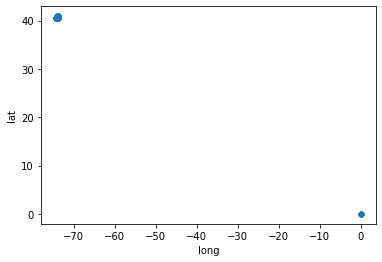

In [62]:
df.plot(kind = "scatter", x = "LONGITUDE", y = "LATITUDE", xlabel = "long", ylabel = "lat")

#### Some points have the coordinates (0, 0) so we need to remove them from the dataset

In [63]:
# drop rows with longitude == 0 and longitude as NaN

df = df.loc[df.LONGITUDE != 0]
df = df[df.LONGITUDE.notna()]

print(df.LATITUDE.isna().sum())
print(df.loc[df.LATITUDE == 0].shape[0])

df.head()

0
0


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1,01/01/2022,14:43,NaN,NaN,40.769993,-73.915825,"(40.769993, -73.915825)",GRAND CENTRAL PKWY,NaN,NaN,...,NaN,NaN,NaN,NaN,4491406,Sedan,Sedan,NaN,NaN,NaN
2,01/01/2022,21:20,QUEENS,11414.0,40.657230,-73.841380,"(40.65723, -73.84138)",91 STREET,160 AVENUE,NaN,...,NaN,NaN,NaN,NaN,4491466,Sedan,NaN,NaN,NaN,NaN
5,01/01/2022,13:07,QUEENS,11373.0,40.742737,-73.876430,"(40.742737, -73.87643)",NaN,NaN,89-22 43 AVENUE,...,Unspecified,Unspecified,NaN,NaN,4491843,Sedan,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN
6,01/01/2022,14:33,NaN,NaN,40.759945,-73.838700,"(40.759945, -73.8387)",VAN WYCK EXPWY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4491841,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
7,01/01/2022,6:00,BROOKLYN,11222.0,40.723910,-73.948845,"(40.72391, -73.948845)",NaN,NaN,132 ECKFORD STREET,...,Unspecified,NaN,NaN,NaN,4491833,Sedan,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='long', ylabel='lat'>

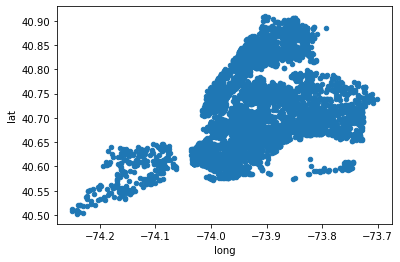

In [64]:
df.plot(kind = "scatter", x = "LONGITUDE", y = "LATITUDE", xlabel = "long", ylabel = "lat")

In [65]:
long = df.LONGITUDE
lat = df.LATITUDE

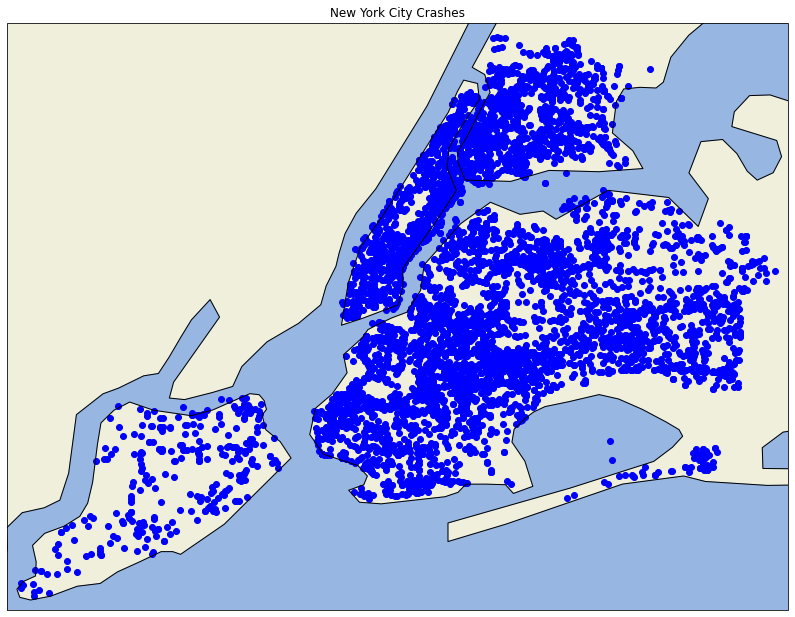

In [87]:
fig = plt.figure(figsize=(14, 14))
m = plt.axes(projection=ccrs.PlateCarree())
plt.title("New York City Crashes")
m.set_extent([min(long) - 0.01, max(long) + 0.01, min(lat) - 0.01, max(lat) + 0.01], ccrs.PlateCarree()) 
m.add_feature(cfeature.LAND)
m.add_feature(cfeature.OCEAN)
m.scatter(df.LONGITUDE, df.LATITUDE, color = "blue")
m.coastlines()